In [1]:
import numpy as np
import pandas as pd

In [33]:
# import in a pandas dataframe the dataset
data1 = pd.read_csv('DATA_for_visualization/data_v1_for_t-SNE__R50_e3_n2_nd1000.dat', sep = '\t', header = None)
data1.shape

(1000, 5)

In [34]:
# this works only if there are effectively 5 columns
data1.columns = ['x1','x2','x3','x4','x5']

# import in a separated numpy array the color labels 
color1 = pd.read_csv('DATA_for_visualization/color_v1_for_t-SNE__R50_e3_n2_nd1000.dat', sep = '\t', header = None)
color1 = color1.values.flatten()

First of all we take a quick look at the dataset using pandas methods:
* head shows the first 5 rows;
* describe gives us some statistical descriptors of the dataset.

In [4]:
data1.head()

,x1,x2,x3,x4,x5
0,21.508,-32.514,-51.861,-28.455,-8.882
1,9.886,-11.606,-21.953,-19.338,-2.747
2,36.548,-21.188,-46.424,-10.763,-2.112
3,-0.808,-0.872,-8.373,-38.594,-7.829
4,37.563,27.401,16.005,-18.521,-9.128


In [5]:
data1.describe()

,x1,x2,x3,x4,x5
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,16.825300,2.939053,-11.190577,-12.700631,-7.756682
std,19.490307,14.493572,17.224971,15.759366,4.590554
min,-12.487000,-33.821000,-57.960000,-50.200000,-19.483000
25%,1.105250,-7.611000,-22.071500,-24.575250,-10.953500
50%,11.102500,3.499500,-6.614500,-6.236000,-7.677500
75%,27.296000,13.362500,-0.733250,-0.687500,-4.607750
max,68.887000,35.175000,23.463000,11.328000,8.499000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Now we exploit the seaborn method pairplot to visualize all possible orthogonal projections in two dimensions of the dataset. Notice that along the diagonal are shown the distributions of each variable through an histogram representation.

This step helps us in understanding what to expect from a more advanced visualization like the one provided by t-SNE algorithm. 

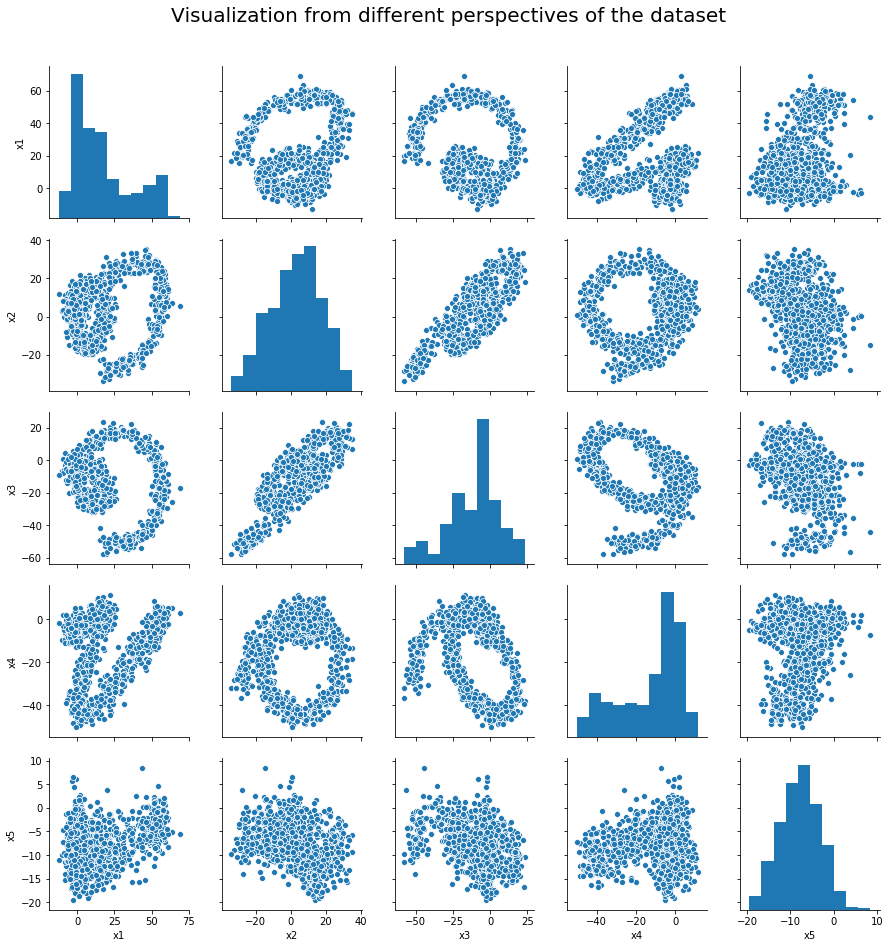

In [39]:
sns.pairplot(data1)
plt.suptitle("Visualization from different perspectives of the dataset ", fontsize = 20, y = 1.05)
plt.show()
plt.close()

## Visualization through t-SNE

In [68]:
def plot_t_SNE(X, ax, colors = None, **kwargs ):
    
    """ 
    ---------------------
    INPUTS:
    X : numpy ndarray
    ax : matplotlib axis of a figure
    colors : numpy array of length X.shape[0]
    possible kwargs: 
        - n_component (default = 2)
        - init = {'random', 'pca'} (default = 'random')
        - perplexity (range between 2 and 100, default = 30)
        - n_iter (default = 1000)
        - learning_rate (default = 200)
    
    see help(sklearn.manifold.t_sne) for all possible keywords
    """
    
    from matplotlib.ticker import NullFormatter
    from sklearn import manifold
    
    # create a new instance of TSNE class
    tsne = manifold.TSNE(**kwargs)
    # apply t_SNE transform to the original dataset X
    Y = tsne.fit_transform(X)
    
    title = ''
    for key in kwargs:
        # if the parameter is an integer
        if isinstance(kwargs[key], int):
            title += key+' = %d \n'%kwargs[key]
        # if the parameter is a string (no other options available)
        else:
            title += key+' = '+kwargs[key]+' \n'
    
    
    if title == '':
        # default title
        ax.set_title("Perplexity = %d" % 30)
    else:
        #custom title
        ax.set_title(title)
    
    # plots the result (works only for 2 components) 
    ax.scatter(Y[:,0], Y[:,1], c = color1, cmap = 'plasma')

    # removes ticks from axis
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    


In [69]:
plt.close()

# map the pandas dataframe to a numpy ndarray
X = data1.values

# list of all the parameters we want to try
perplexities = [2, 5, 30, 50, 100]

# instead of grid-searching all possible combinations, we just want to try single variations from the default parameters
# default options: init = 'random', n_iter = 1000, learning_rate = 200
kw_dict = {}
kw_dict = dict(init = 'pca', n_iter = 2000, learning_rate = 100)
print(kw_dict)
print(len(kw_dict))

{'init': 'pca', 'n_iter': 2000, 'learning_rate': 100}
3


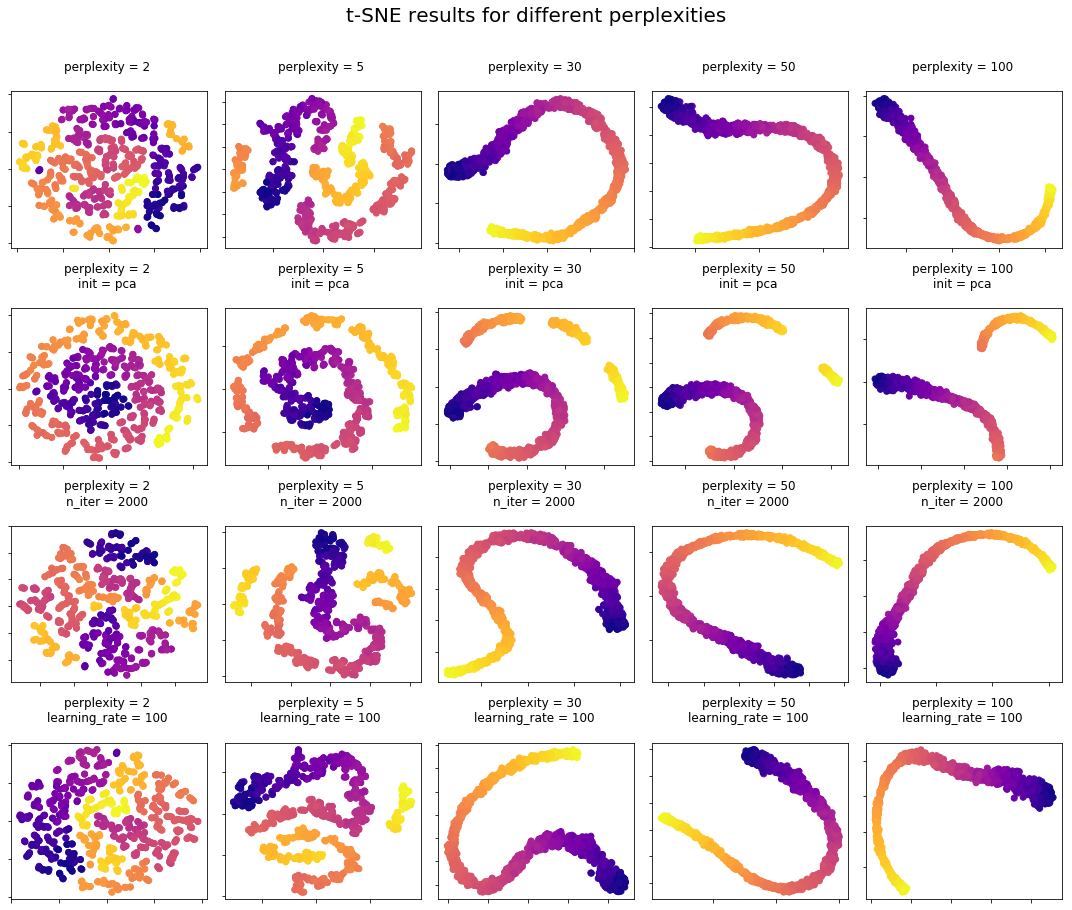

In [72]:
n_rows = len(kw_dict)+1
(fig, subplots) = plt.subplots(n_rows, 5, figsize=(15, 3*n_rows))
plt.suptitle("t-SNE results for different perplexities", fontsize = 20, y = 1.05)

# first we execute it once with default settings
for j, perplexity in enumerate(perplexities):
        ax = subplots[0][j]
        plot_t_SNE(X, ax, colors = color1, perplexity = perplexity)

# then we cicle among all the parameters of the dictionary
for i, key in enumerate(kw_dict):
    for j, perplexity in enumerate(perplexities):
        ax = subplots[i+1][j]
        plot_t_SNE(X, ax, colors = color1, perplexity = perplexity, **{key : kw_dict[key]})

plt.tight_layout()
plt.show()

In [79]:
def plot3D_t_SNE(X, colors = None, **kwargs ):
    
    """ 
    ---------------------
    INPUTS:
    X : numpy ndarray
    ax : matplotlib axis of a figure
    colors : numpy array of length X.shape[0]
    possible kwargs: 
        - n_component (default = 3)
        - init = {'random', 'pca'} (default = 'random')
        - perplexity (range between 2 and 100, default = 30)
        - n_iter (default = 1000)
        - learning_rate (default = 200)
    
    see help(sklearn.manifold.t_sne) for all possible keywords
    """
    
    from sklearn import manifold
    # we use plotly library for 3D plotting
    import plotly as py # main class
    import plotly.graph_objs as go # graphical objects
    py = py.offline
    py.init_notebook_mode(connected=True)

    # create a new instance of TSNE class
    kwargs['n_components'] = 3
    tsne = manifold.TSNE(**kwargs)
    # apply t_SNE transform to the original dataset X
    Y = tsne.fit_transform(X)
    
    title = ''
    for key in kwargs:
        # if the parameter is an integer
        if isinstance(kwargs[key], int):
            title += key+' = %d , '%kwargs[key]
        # if the parameter is a string (no other options available)
        else:
            title += key+' = '+kwargs[key]+' , '
    
    if title == '':
        # default title
        title = "Perplexity = %d" % 30
    
    # plots the result (works only for 2 components) 
    ax.scatter(Y[:,0], Y[:,1], c = color1, cmap = 'plasma')
    
    # pay attention at matplotlib compatibility!!
    trace1 = go.Scatter3d(x=Y[:,0], y=Y[:,1], z=Y[:,2], mode='markers', marker = dict(colorscale='Electric', 
                         color=colors, line=dict(width=0)))
    # opacity = 0.7,
    data = [trace1]
    layout = go.Layout(title = title)
    fig = go.Figure(data=data, layout = layout)
    py.iplot(fig)


In [81]:
plot3D_t_SNE(X, color1, perplexity = 5, init = 'pca')

In [14]:
# https://distill.pub/2016/misread-tsne/

In [76]:
help(manifold.TSNE)

Help on class TSNE in module sklearn.manifold.t_sne:

class TSNE(sklearn.base.BaseEstimator)
 |  TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0, random_state=None, method='barnes_hut', angle=0.5)
 |  
 |  t-distributed Stochastic Neighbor Embedding.
 |  
 |  t-SNE [1] is a tool to visualize high-dimensional data. It converts
 |  similarities between data points to joint probabilities and tries
 |  to minimize the Kullback-Leibler divergence between the joint
 |  probabilities of the low-dimensional embedding and the
 |  high-dimensional data. t-SNE has a cost function that is not convex,
 |  i.e. with different initializations we can get different results.
 |  
 |  It is highly recommended to use another dimensionality reduction
 |  method (e.g. PCA for dense data or TruncatedSVD for sparse data)
 |  to reduce the number of dimensions to a rea